### Neural Nets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
nets_shape = [10,5]
input_size = 2
output_size = 2    #2

In [ ]:
def oneHot(pred,n_class):
    m = pred.shape[0]
    oht = np.zeros((m,n_class))
    oht[np.arange(m),pred] = 1
    return oht

def sigmoid(z):
    return 1/(1+np.exp(-z))

def relu(z):
    if z>0:
        return z
    else:
        return 0

def softMax(z):
    num = np.exp(z)
    den = np.sum(np.exp(z),axis = 1)
    m = den.shape[0]
    den = den.reshape(m,1)
    return num/den

In [106]:
class Model:
    def __init__(self,input_size,nets_shape,output_size):
        #np.random.seed(0)
        self.input_size = input_size
        self.nets_shape = nets_shape
        self.output_size = output_size
        
        self.layers = {}
        
        self.layers['w1'] = np.random.random((input_size,nets_shape[0]))
        self.layers['b1'] = np.random.random((1,nets_shape[0]))
        
        #loop here for multiple hidden layers(post testing on dataset with keras)
        self.layers['w2'] = np.random.random((nets_shape[0],nets_shape[1]))
        self.layers['b2'] = np.random.random((1,nets_shape[1]))
        
        self.layers['w3'] = np.random.random((nets_shape[1],output_size))
        self.layers['b3'] = np.random.random((1,output_size))
        
    
    def forward(self,X_train):
        
        z1 = np.dot(X_train,self.layers['w1']) + self.layers['b1']
        a1 = sigmoid(z1)
        
        z2 = np.dot(a1,self.layers['w2']) + self.layers['b2']
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2,self.layers['w3']) + self.layers['b3']
        y_ = softMax(z3)
        
        self.activations = (a1,a2,y_)
        self._z = (z1,z2,z3)

        return y_
        
        
    def backward(self,X_train,Y_train,learning_rate):
        
        m = X_train.shape[0]
        a1,a2,y_ = self.activations
        z1,z2,z3 = self._z
        layers = self.layers

        y_oht = oneHot(Y_train,self.output_size)
        
        #output layer
        delta3 = y_ - y_oht
        dw3 = np.dot(a2.T,delta3)/float(m)
        db3 = np.mean(delta3,axis = 0)
        
        #Hidden layers
        delta2 = (np.dot(delta3,layers['w3'].T))*(1-(np.tanh(z2)**2))
        dw2 = np.dot(a1.T,delta2)/float(m)
        db2 = np.mean(delta2,axis = 0)
            
        delta1 = (np.dot(delta2,layers['w2'].T))*(1-(np.tanh(z1)**2))
        dw1 = np.dot(X_train.T,delta1)/float(m)
        db1 = np.mean(delta1,axis = 0)
            
        self.layers['w3'] -= learning_rate*dw3
        self.layers['w2'] -= learning_rate*dw2
        self.layers['w1'] -= learning_rate*dw1
        
        self.layers['b3'] -= learning_rate*db3
        self.layers['b2'] -= learning_rate*db2
        self.layers['b1'] -= learning_rate*db1
    
    def train(self,X_train,Y_train,learning_rate,epochs):
        loss = []
        
        for e in range(epochs):
            y_ = self.forward(X_train)
            y_oht = oneHot(Y_train,self.output_size)
            l = -1*np.mean(np.sum((y_oht*np.log(y_)),axis = 1),axis = 0)
            loss.append(l)
            self.backward(X_train,Y_train,learning_rate)
        
        return loss
              
    def predict(self,X):
        y_ = self.forward(X)
        pred = np.argmax(y_,axis = 1)
        return pred


In [107]:
from sklearn.datasets import make_moons,make_circles

In [108]:
#X,Y = make_circles(n_samples = 400,noise = 0.1,random_state = 2,factor = 0.5)
X,Y = make_moons(n_samples = 200,noise = 0.1,random_state = 2)

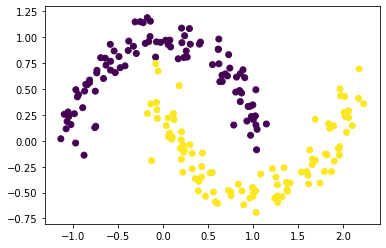

In [109]:
plt.scatter(X[:,0],X[:,1],c = Y)

In [110]:
model = Model(input_size,nets_shape,output_size)

In [111]:
loss = model.train(X,Y,0.9,500)

In [112]:
pred = model.predict(X)

In [113]:
np.sum(pred == Y)/Y.shape[0]

0.99

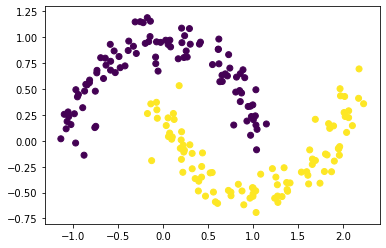

In [114]:
plt.scatter(X[:,0],X[:,1],c = pred)

In [115]:
print(pred)

[1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1
 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1
 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1]


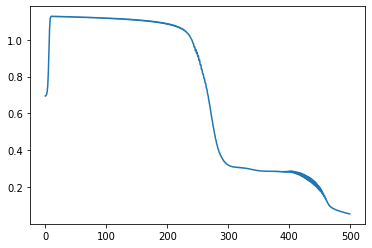

In [116]:
plt.plot(loss)

In [117]:
def visualizeClassifier(start,end,n,model,X):
    x = np.linspace(start,end,n)
    y = np.linspace(start,end,n)
    X_ = []
    for i in range(n):
        for j in range(n):
            X_.append([x[i],y[j]])
    X_ = np.array(X_)
    X_.reshape(-1,2)
    pred_ = model.predict(X_)
    pred = model.predict(X)
    plt.scatter(X_[:,0],X_[:,1],c = pred_)
    plt.scatter(X[:,0],X[:,1],c = pred)
    plt.show()

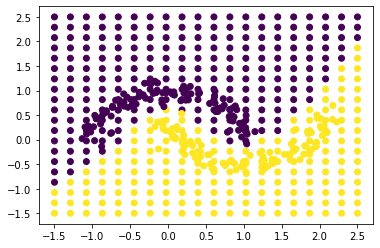

In [118]:
visualizeClassifier(-1.5,2.5,20,model,X)

In [119]:
start = -1.5
end = 2.5
n = 20

def analyse(X,Y,learning_rate = 0.9,epochs = 1000):
    model = Model(input_size,nets_shape,output_size)
    loss = model.train(X,Y,learning_rate,epochs)
    pred = model.predict(X)
    acc = np.sum(pred == Y)/Y.shape[0]
    
    #printing,Plotting
    print('acc = ',acc)
    plt.scatter(X[:,0],X[:,1],c = Y)
    plt.show()
    visualizeClassifier(-1.5,2.5,20,model,X)
    plt.show()
    plt.plot(loss)
    plt.show()
    plt.scatter(X[:,0],X[:,1],c = pred)
    plt.show()

In [120]:
X,Y = make_moons(n_samples = 200,noise = 0.1,random_state = 2)

acc =  1.0


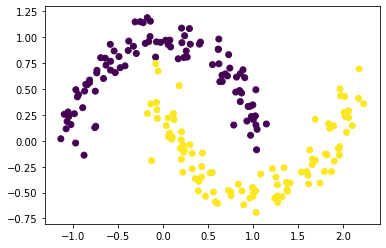

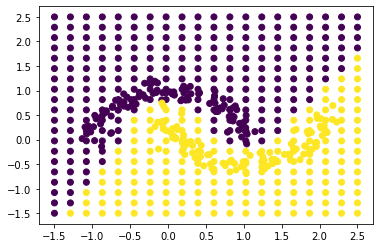

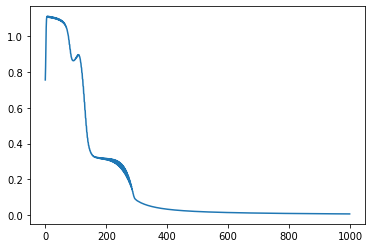

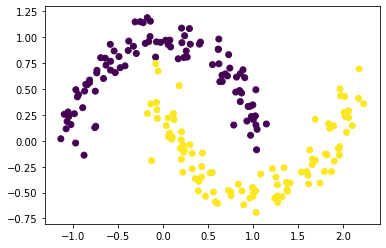

In [121]:
analyse(X,Y)

In [122]:
from sklearn.datasets import make_circles

In [123]:
X,Y = make_circles(n_samples = 400,noise = 0.1,random_state = 2)

acc =  0.885


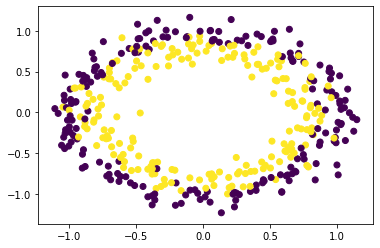

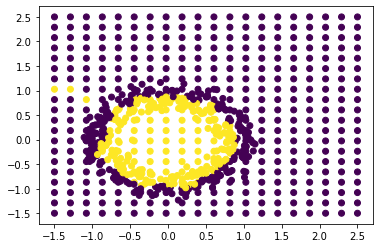

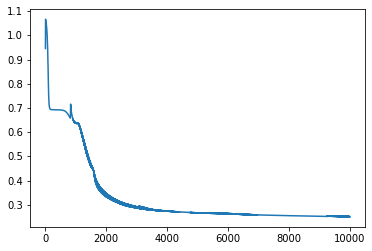

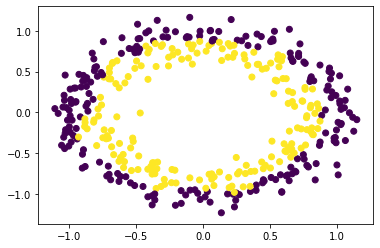

In [124]:
analyse(X,Y,epochs = 10000)

In [125]:
from sklearn.datasets import make_classification

In [126]:
X,Y = make_classification(n_samples = 500,n_classes = 2,n_features = 2,n_informative = 2,n_redundant = 0,random_state = 2)

acc =  0.952


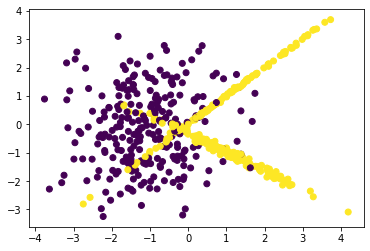

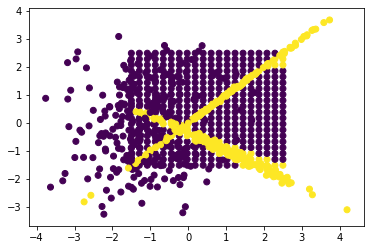

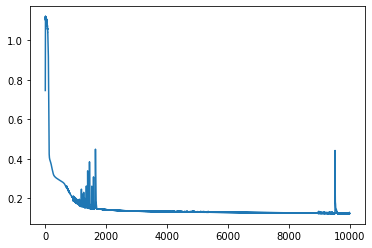

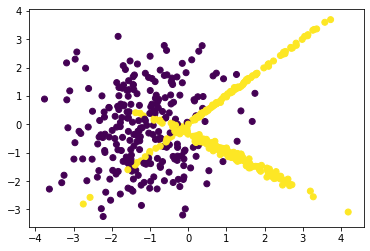

In [127]:
analyse(X,Y,epochs = 10000)

### Keras

In [1]:
import tensorflow 
from tensorflow import keras

/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.

In [2]:
from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


In [3]:
from keras.optimizers import Adam

In [4]:
adam = Adam()

In [5]:
model = Sequential()
model.add(Dense(40,input_shape = (2,)))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(5,activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))
model.summary()
model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 12        
Total params: 597
Trainable params: 597
Non-trainable params: 0
_________________________________________________________________


In [10]:
from sklearn.datasets import make_moons,make_circles
from keras.utils import to_categorical

In [7]:
X,Y = make_circles(n_samples = 200,noise = 0.1,random_state = 2)

In [11]:
y_oht = to_categorical(Y,2)

In [12]:
hist = model.fit(X,y_oht,epochs = 500,validation_split = 0.2)

Train on 160 samples, validate on 40 samples
Epoch 1/500
160/160 [==============================] - 1s 4ms/step - loss: 0.6951 - accuracy: 0.4938 - val_loss: 0.6778 - val_accuracy: 0.5500
Epoch 2/500
160/160 [==============================] - 0s 221us/step - loss: 0.6933 - accuracy: 0.4812 - val_loss: 0.6817 - val_accuracy: 0.5500
Epoch 3/500
160/160 [==============================] - 0s 207us/step - loss: 0.6913 - accuracy: 0.5063 - val_loss: 0.6838 - val_accuracy: 0.5500
Epoch 4/500
160/160 [==============================] - 0s 294us/step - loss: 0.6910 - accuracy: 0.5063 - val_loss: 0.6871 - val_accuracy: 0.5000
Epoch 5/500
160/160 [==============================] - 0s 283us/step - loss: 0.6895 - accuracy: 0.5188 - val_loss: 0.6887 - val_accuracy: 0.5250
Epoch 6/500
160/160 [==============================] - 0s 183us/step - loss: 0.6886 - accuracy: 0.5188 - val_loss: 0.6906 - val_accuracy: 0.5250
Epoch 7/500
160/160 [==============================] - 0s 148us/step - loss: 0.6878 - a

160/160 [==============================] - 0s 184us/step - loss: 0.6339 - accuracy: 0.7688 - val_loss: 0.6607 - val_accuracy: 0.6500
Epoch 57/500
160/160 [==============================] - 0s 193us/step - loss: 0.6315 - accuracy: 0.7625 - val_loss: 0.6637 - val_accuracy: 0.6500
Epoch 58/500
160/160 [==============================] - 0s 189us/step - loss: 0.6292 - accuracy: 0.7625 - val_loss: 0.6602 - val_accuracy: 0.6500
Epoch 59/500
160/160 [==============================] - 0s 140us/step - loss: 0.6281 - accuracy: 0.7563 - val_loss: 0.6587 - val_accuracy: 0.6500
Epoch 60/500
160/160 [==============================] - 0s 145us/step - loss: 0.6260 - accuracy: 0.7625 - val_loss: 0.6539 - val_accuracy: 0.6250
Epoch 61/500
160/160 [==============================] - 0s 145us/step - loss: 0.6238 - accuracy: 0.7625 - val_loss: 0.6496 - val_accuracy: 0.6500
Epoch 62/500
160/160 [==============================] - 0s 138us/step - loss: 0.6215 - accuracy: 0.7688 - val_loss: 0.6497 - val_accuracy

Epoch 112/500
160/160 [==============================] - 0s 123us/step - loss: 0.5056 - accuracy: 0.7875 - val_loss: 0.4646 - val_accuracy: 0.8750
Epoch 113/500
160/160 [==============================] - 0s 164us/step - loss: 0.5049 - accuracy: 0.7625 - val_loss: 0.4573 - val_accuracy: 0.8750
Epoch 114/500
160/160 [==============================] - 0s 124us/step - loss: 0.5039 - accuracy: 0.7688 - val_loss: 0.4512 - val_accuracy: 0.8750
Epoch 115/500
160/160 [==============================] - 0s 120us/step - loss: 0.5010 - accuracy: 0.7750 - val_loss: 0.4533 - val_accuracy: 0.8750
Epoch 116/500
160/160 [==============================] - 0s 139us/step - loss: 0.5012 - accuracy: 0.8000 - val_loss: 0.4688 - val_accuracy: 0.8500
Epoch 117/500
160/160 [==============================] - 0s 108us/step - loss: 0.4972 - accuracy: 0.7812 - val_loss: 0.4539 - val_accuracy: 0.8500
Epoch 118/500
160/160 [==============================] - 0s 128us/step - loss: 0.4979 - accuracy: 0.7812 - val_loss: 0

Epoch 168/500
160/160 [==============================] - 0s 138us/step - loss: 0.4223 - accuracy: 0.8062 - val_loss: 0.3443 - val_accuracy: 0.8750
Epoch 169/500
160/160 [==============================] - 0s 133us/step - loss: 0.4236 - accuracy: 0.8188 - val_loss: 0.3432 - val_accuracy: 0.9000
Epoch 170/500
160/160 [==============================] - 0s 103us/step - loss: 0.4185 - accuracy: 0.8125 - val_loss: 0.3348 - val_accuracy: 0.9000
Epoch 171/500
160/160 [==============================] - 0s 119us/step - loss: 0.4184 - accuracy: 0.8062 - val_loss: 0.3309 - val_accuracy: 0.9000
Epoch 172/500
160/160 [==============================] - 0s 123us/step - loss: 0.4206 - accuracy: 0.8125 - val_loss: 0.3279 - val_accuracy: 0.9000
Epoch 173/500
160/160 [==============================] - 0s 116us/step - loss: 0.4179 - accuracy: 0.8250 - val_loss: 0.3327 - val_accuracy: 0.9000
Epoch 174/500
160/160 [==============================] - 0s 131us/step - loss: 0.4183 - accuracy: 0.8000 - val_loss: 0

Epoch 224/500
160/160 [==============================] - 0s 132us/step - loss: 0.3836 - accuracy: 0.8438 - val_loss: 0.2786 - val_accuracy: 0.9000
Epoch 225/500
160/160 [==============================] - 0s 154us/step - loss: 0.3828 - accuracy: 0.8375 - val_loss: 0.2846 - val_accuracy: 0.9250
Epoch 226/500
160/160 [==============================] - 0s 115us/step - loss: 0.3832 - accuracy: 0.8313 - val_loss: 0.2900 - val_accuracy: 0.8750
Epoch 227/500
160/160 [==============================] - 0s 127us/step - loss: 0.3841 - accuracy: 0.8562 - val_loss: 0.2849 - val_accuracy: 0.9000
Epoch 228/500
160/160 [==============================] - 0s 138us/step - loss: 0.3790 - accuracy: 0.8438 - val_loss: 0.2767 - val_accuracy: 0.9000
Epoch 229/500
160/160 [==============================] - 0s 128us/step - loss: 0.3855 - accuracy: 0.8375 - val_loss: 0.2720 - val_accuracy: 0.9250
Epoch 230/500
160/160 [==============================] - 0s 126us/step - loss: 0.3816 - accuracy: 0.8313 - val_loss: 0

Epoch 280/500
160/160 [==============================] - 0s 124us/step - loss: 0.3677 - accuracy: 0.8500 - val_loss: 0.2563 - val_accuracy: 0.8750
Epoch 281/500
160/160 [==============================] - 0s 150us/step - loss: 0.3651 - accuracy: 0.8375 - val_loss: 0.2662 - val_accuracy: 0.9000
Epoch 282/500
160/160 [==============================] - 0s 127us/step - loss: 0.3647 - accuracy: 0.8438 - val_loss: 0.2671 - val_accuracy: 0.8500
Epoch 283/500
160/160 [==============================] - 0s 109us/step - loss: 0.3634 - accuracy: 0.8625 - val_loss: 0.2555 - val_accuracy: 0.8500
Epoch 284/500
160/160 [==============================] - 0s 123us/step - loss: 0.3661 - accuracy: 0.8500 - val_loss: 0.2478 - val_accuracy: 0.9000
Epoch 285/500
160/160 [==============================] - 0s 106us/step - loss: 0.3633 - accuracy: 0.8500 - val_loss: 0.2628 - val_accuracy: 0.9250
Epoch 286/500
160/160 [==============================] - 0s 104us/step - loss: 0.3730 - accuracy: 0.8375 - val_loss: 0

Epoch 336/500
160/160 [==============================] - 0s 162us/step - loss: 0.3565 - accuracy: 0.8500 - val_loss: 0.2471 - val_accuracy: 0.8750
Epoch 337/500
160/160 [==============================] - 0s 170us/step - loss: 0.3518 - accuracy: 0.8625 - val_loss: 0.2420 - val_accuracy: 0.8750
Epoch 338/500
160/160 [==============================] - 0s 188us/step - loss: 0.3571 - accuracy: 0.8562 - val_loss: 0.2453 - val_accuracy: 0.8750
Epoch 339/500
160/160 [==============================] - 0s 134us/step - loss: 0.3448 - accuracy: 0.8625 - val_loss: 0.2657 - val_accuracy: 0.9000
Epoch 340/500
160/160 [==============================] - 0s 153us/step - loss: 0.3555 - accuracy: 0.8500 - val_loss: 0.2720 - val_accuracy: 0.8750
Epoch 341/500
160/160 [==============================] - 0s 125us/step - loss: 0.3546 - accuracy: 0.8625 - val_loss: 0.2514 - val_accuracy: 0.8750
Epoch 342/500
160/160 [==============================] - 0s 132us/step - loss: 0.3530 - accuracy: 0.8562 - val_loss: 0

Epoch 392/500
160/160 [==============================] - 0s 196us/step - loss: 0.3418 - accuracy: 0.8687 - val_loss: 0.2428 - val_accuracy: 0.8500
Epoch 393/500
160/160 [==============================] - 0s 163us/step - loss: 0.3416 - accuracy: 0.8687 - val_loss: 0.2414 - val_accuracy: 0.8750
Epoch 394/500
160/160 [==============================] - 0s 125us/step - loss: 0.3423 - accuracy: 0.8687 - val_loss: 0.2605 - val_accuracy: 0.8750
Epoch 395/500
160/160 [==============================] - 0s 168us/step - loss: 0.3488 - accuracy: 0.8687 - val_loss: 0.2481 - val_accuracy: 0.8500
Epoch 396/500
160/160 [==============================] - 0s 170us/step - loss: 0.3400 - accuracy: 0.8687 - val_loss: 0.2421 - val_accuracy: 0.8750
Epoch 397/500
160/160 [==============================] - 0s 124us/step - loss: 0.3399 - accuracy: 0.8562 - val_loss: 0.2415 - val_accuracy: 0.8750
Epoch 398/500
160/160 [==============================] - 0s 129us/step - loss: 0.3439 - accuracy: 0.8625 - val_loss: 0

Epoch 448/500
160/160 [==============================] - 0s 138us/step - loss: 0.3395 - accuracy: 0.8750 - val_loss: 0.2560 - val_accuracy: 0.8750
Epoch 449/500
160/160 [==============================] - 0s 135us/step - loss: 0.3353 - accuracy: 0.8750 - val_loss: 0.2451 - val_accuracy: 0.8250
Epoch 450/500
160/160 [==============================] - 0s 112us/step - loss: 0.3406 - accuracy: 0.8562 - val_loss: 0.2293 - val_accuracy: 0.8750
Epoch 451/500
160/160 [==============================] - 0s 131us/step - loss: 0.3457 - accuracy: 0.8562 - val_loss: 0.2478 - val_accuracy: 0.9250
Epoch 452/500
160/160 [==============================] - 0s 165us/step - loss: 0.3369 - accuracy: 0.8813 - val_loss: 0.2374 - val_accuracy: 0.8750
Epoch 453/500
160/160 [==============================] - 0s 141us/step - loss: 0.3392 - accuracy: 0.8562 - val_loss: 0.2371 - val_accuracy: 0.8750
Epoch 454/500
160/160 [==============================] - 0s 123us/step - loss: 0.3387 - accuracy: 0.8625 - val_loss: 0

In [13]:
pred = model.predict(X)

In [ ]:
pred = np.argmax(pred,axis = 1)
print(pred)

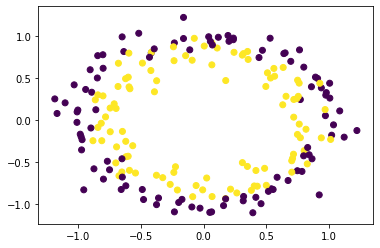

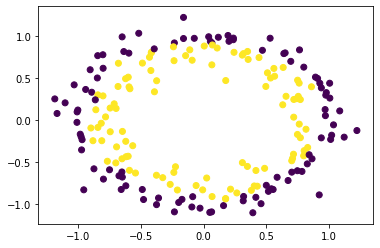

In [138]:
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()
plt.scatter(X[:,0],X[:,1],c = pred)

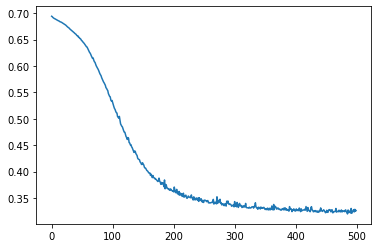

In [139]:
plt.plot(hist.history['loss'])

In [140]:
print(l)

binary_crossentropy


In [149]:
start = -1.5
end = 1.5
n = 20
def visualizeKerasClassifier(start,end,n,model,hist,X,Y):
    x = np.linspace(start,end,n)
    y = np.linspace(start,end,n)
    X_ = []
    for i in range(n):
        for j in range(n):
            X_.append([x[i],y[j]])
    X_ = np.array(X_)
    X_.reshape(-1,2)
    pred_ = np.argmax(model.predict(X_),axis = 1)
    pred = np.argmax(model.predict(X),axis = 1)
    acc = np.sum(pred == Y)/Y.shape[0]
    print('acc = ', acc)
    plt.scatter(X_[:,0],X_[:,1],c = pred_)
    plt.show()
    plt.scatter(X[:,0],X[:,1],c = pred)
    plt.show()
    plt.scatter(X[:,0],X[:,1],c = Y)
    plt.show()
    plt.plot(hist.history['loss'],c = 'blue',label = 'loss')
    plt.plot(hist.history['accuracy'],c = 'yellow',label = 'acc')
    plt.show()

acc =  0.865


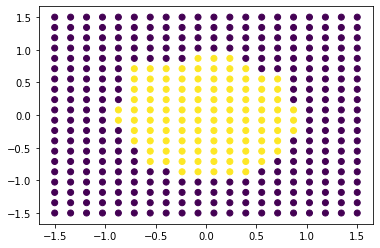

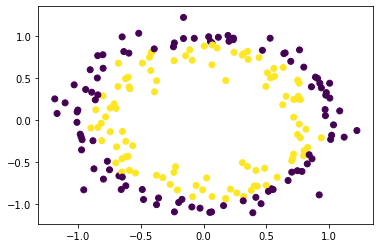

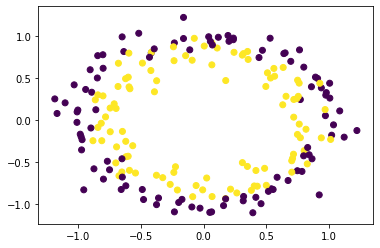

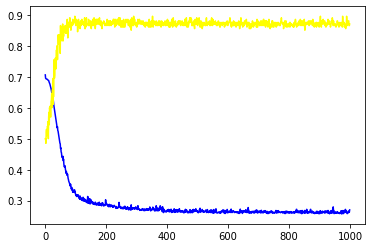

In [150]:
visualizeKerasClassifier(start,end,n,model,hist,X,Y)

In [151]:
def makeModel():
    model = Sequential()
    model.add(Dense(40,input_shape = (2,)))
    model.add(Dense(10,activation = 'relu'))
    model.add(Dense(5,activation = 'relu'))
    model.add(Dense(2,activation = 'softmax'))
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [152]:
model = makeModel()

In [153]:
X,Y = make_circles(n_samples = 200,noise = 0.1,random_state = 2)

In [154]:
def trainKerasModel(X,Y,epoch = 1000):
    y_oht = oneHot(Y,2)
    model = makeModel()
    hist = model.fit(X,y_oht,epochs = epoch)
    return model,hist

In [155]:
model,hist = trainKerasModel(X,Y)

Epoch 1/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.7255 - accuracy: 0.4450
Epoch 2/1000
200/200 [==============================] - 0s 195us/step - loss: 0.6926 - accuracy: 0.5000
Epoch 3/1000
200/200 [==============================] - 0s 170us/step - loss: 0.6940 - accuracy: 0.4750
Epoch 4/1000
200/200 [==============================] - 0s 154us/step - loss: 0.6907 - accuracy: 0.4950
Epoch 5/1000
200/200 [==============================] - 0s 165us/step - loss: 0.6889 - accuracy: 0.5300
Epoch 6/1000
200/200 [==============================] - 0s 183us/step - loss: 0.6869 - accuracy: 0.5250
Epoch 7/1000
200/200 [==============================] - 0s 129us/step - loss: 0.6853 - accuracy: 0.5200
Epoch 8/1000
200/200 [==============================] - 0s 102us/step - loss: 0.6849 - accuracy: 0.5300
Epoch 9/1000
200/200 [==============================] - 0s 163us/step - loss: 0.6825 - accuracy: 0.5450
Epoch 10/1000
200/200 [==============================] - 0s 115us/

200/200 [==============================] - 0s 96us/step - loss: 0.3079 - accuracy: 0.8750
Epoch 156/1000
200/200 [==============================] - 0s 93us/step - loss: 0.3064 - accuracy: 0.8800
Epoch 157/1000
200/200 [==============================] - 0s 101us/step - loss: 0.3057 - accuracy: 0.8900
Epoch 158/1000
200/200 [==============================] - 0s 112us/step - loss: 0.3080 - accuracy: 0.8800
Epoch 159/1000
200/200 [==============================] - 0s 92us/step - loss: 0.3116 - accuracy: 0.8800
Epoch 160/1000
200/200 [==============================] - 0s 125us/step - loss: 0.3085 - accuracy: 0.8800
Epoch 161/1000
200/200 [==============================] - 0s 118us/step - loss: 0.3160 - accuracy: 0.8650
Epoch 162/1000
200/200 [==============================] - 0s 148us/step - loss: 0.3120 - accuracy: 0.8700
Epoch 163/1000
200/200 [==============================] - 0s 158us/step - loss: 0.3065 - accuracy: 0.8700
Epoch 164/1000
200/200 [==============================] - 0s 150

200/200 [==============================] - 0s 79us/step - loss: 0.2942 - accuracy: 0.8850
Epoch 310/1000
200/200 [==============================] - 0s 83us/step - loss: 0.3025 - accuracy: 0.8800
Epoch 311/1000
200/200 [==============================] - 0s 74us/step - loss: 0.3113 - accuracy: 0.8600
Epoch 312/1000
200/200 [==============================] - 0s 68us/step - loss: 0.3062 - accuracy: 0.8750
Epoch 313/1000
200/200 [==============================] - 0s 77us/step - loss: 0.2940 - accuracy: 0.8750
Epoch 314/1000
200/200 [==============================] - 0s 73us/step - loss: 0.3008 - accuracy: 0.8850
Epoch 315/1000
200/200 [==============================] - 0s 76us/step - loss: 0.3013 - accuracy: 0.8800
Epoch 316/1000
200/200 [==============================] - 0s 74us/step - loss: 0.2998 - accuracy: 0.8750
Epoch 317/1000
200/200 [==============================] - 0s 75us/step - loss: 0.2950 - accuracy: 0.8750
Epoch 318/1000
200/200 [==============================] - 0s 74us/step

200/200 [==============================] - 0s 150us/step - loss: 0.3026 - accuracy: 0.8750
Epoch 388/1000
200/200 [==============================] - 0s 132us/step - loss: 0.2983 - accuracy: 0.8800
Epoch 389/1000
200/200 [==============================] - 0s 99us/step - loss: 0.2965 - accuracy: 0.8700
Epoch 390/1000
200/200 [==============================] - 0s 107us/step - loss: 0.3106 - accuracy: 0.8600
Epoch 391/1000
200/200 [==============================] - 0s 180us/step - loss: 0.2976 - accuracy: 0.8750
Epoch 392/1000
200/200 [==============================] - 0s 86us/step - loss: 0.3002 - accuracy: 0.8850
Epoch 393/1000
200/200 [==============================] - 0s 84us/step - loss: 0.2961 - accuracy: 0.8750
Epoch 394/1000
200/200 [==============================] - 0s 99us/step - loss: 0.2956 - accuracy: 0.8800
Epoch 395/1000
200/200 [==============================] - 0s 125us/step - loss: 0.2985 - accuracy: 0.8700
Epoch 396/1000
200/200 [==============================] - 0s 117u

200/200 [==============================] - 0s 102us/step - loss: 0.3001 - accuracy: 0.8850
Epoch 542/1000
200/200 [==============================] - 0s 97us/step - loss: 0.2950 - accuracy: 0.8750
Epoch 543/1000
200/200 [==============================] - 0s 96us/step - loss: 0.2985 - accuracy: 0.8700
Epoch 544/1000
200/200 [==============================] - 0s 114us/step - loss: 0.2943 - accuracy: 0.8800
Epoch 545/1000
200/200 [==============================] - 0s 85us/step - loss: 0.3027 - accuracy: 0.8800
Epoch 546/1000
200/200 [==============================] - 0s 115us/step - loss: 0.2990 - accuracy: 0.8750
Epoch 547/1000
200/200 [==============================] - 0s 101us/step - loss: 0.2965 - accuracy: 0.8700
Epoch 548/1000
200/200 [==============================] - 0s 103us/step - loss: 0.2915 - accuracy: 0.8800
Epoch 549/1000
200/200 [==============================] - 0s 117us/step - loss: 0.3000 - accuracy: 0.8900
Epoch 550/1000
200/200 [==============================] - 0s 109

200/200 [==============================] - 0s 119us/step - loss: 0.2923 - accuracy: 0.8850
Epoch 696/1000
200/200 [==============================] - 0s 101us/step - loss: 0.3044 - accuracy: 0.8700
Epoch 697/1000
200/200 [==============================] - 0s 97us/step - loss: 0.2996 - accuracy: 0.8600
Epoch 698/1000
200/200 [==============================] - 0s 85us/step - loss: 0.2976 - accuracy: 0.8850
Epoch 699/1000
200/200 [==============================] - 0s 95us/step - loss: 0.2970 - accuracy: 0.8850
Epoch 700/1000
200/200 [==============================] - 0s 101us/step - loss: 0.2980 - accuracy: 0.8750
Epoch 701/1000
200/200 [==============================] - 0s 122us/step - loss: 0.3015 - accuracy: 0.8750
Epoch 702/1000
200/200 [==============================] - 0s 136us/step - loss: 0.3015 - accuracy: 0.8750
Epoch 703/1000
200/200 [==============================] - 0s 110us/step - loss: 0.2962 - accuracy: 0.8750
Epoch 704/1000
200/200 [==============================] - 0s 93u

200/200 [==============================] - 0s 82us/step - loss: 0.2959 - accuracy: 0.8800
Epoch 850/1000
200/200 [==============================] - 0s 91us/step - loss: 0.2943 - accuracy: 0.8800
Epoch 851/1000
200/200 [==============================] - 0s 78us/step - loss: 0.2953 - accuracy: 0.8800
Epoch 852/1000
200/200 [==============================] - 0s 81us/step - loss: 0.2987 - accuracy: 0.8700
Epoch 853/1000
200/200 [==============================] - 0s 79us/step - loss: 0.2974 - accuracy: 0.8700
Epoch 854/1000
200/200 [==============================] - 0s 85us/step - loss: 0.2958 - accuracy: 0.8900
Epoch 855/1000
200/200 [==============================] - 0s 82us/step - loss: 0.2978 - accuracy: 0.8800
Epoch 856/1000
200/200 [==============================] - 0s 95us/step - loss: 0.2966 - accuracy: 0.8650
Epoch 857/1000
200/200 [==============================] - 0s 80us/step - loss: 0.2972 - accuracy: 0.8750
Epoch 858/1000
200/200 [==============================] - 0s 100us/ste

acc =  0.885


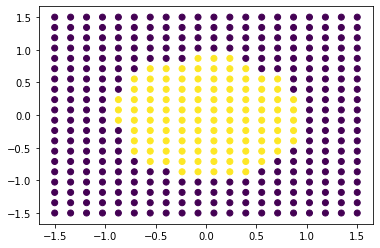

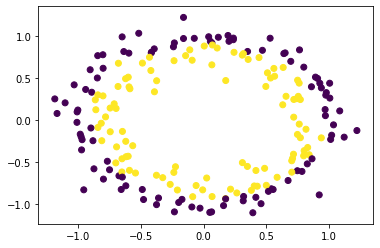

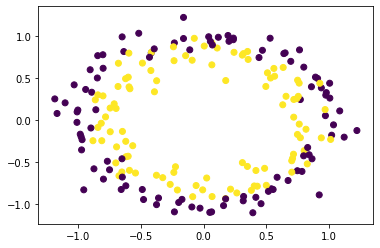

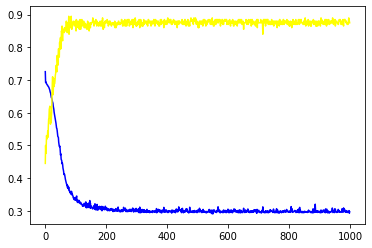

In [156]:
visualizeKerasClassifier(start,end,n,model,hist,X,Y)